# Classification Modeling

In [1]:
import classifiers as clf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

import pickle

### Load Species Data

In [2]:
species = pd.read_pickle("../Data/species.pkl")
species.head()

,Scientific Name,Common Name,Federal Listing Status,Group_Amphibians,Group_Birds,Group_Clams,Group_Crustaceans,Group_Ferns and Allies,Group_Fishes,Group_Flowering Plants,...,State_OR,State_PA,State_SC,State_TN,State_TX,State_UT,State_VA,State_WA,State_WV,State_WY
0,Accipiter gentilis,Northern goshawk,Not Listed,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Acipenser fulvescens,Lake sturgeon,Not Listed,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Acipenser oxyrinchus (=oxyrhynchus) desotoi,Atlantic sturgeon (Gulf subspecies),Threatened,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Agarodes alabamensis,[Unnamed] caddisfly,Not Listed,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agrimonia incisa,Incised groovebur,Not Listed,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Set Target and Feature Variables

In [3]:
# Create target and feature variables
y = species['Federal Listing Status']
X = species.drop(['Federal Listing Status', 'Scientific Name', 'Common Name'], axis = 1)

### Create Training and Test Sets

In [4]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# federal listing status
print('Training Data: ' + str(y_train.count()))
print('Endangered:    ' + str((y_train == 'Endangered').sum() / y_train.count()))
print('Not Listed:    ' + str((y_train == 'Not Listed').sum() / y_train.count()))
print('Threatened:    ' + str((y_train == 'Threatened').sum() / y_train.count()))

# federal listing status
print('Test Data:     ' + str(y_test.count()))
print('Endangered:    ' + str((y_test == 'Endangered').sum() / y_test.count()))
print('Not Listed:    ' + str((y_test == 'Not Listed').sum() / y_test.count()))
print('Threatened:    ' + str((y_test == 'Threatened').sum() / y_test.count()))

Training Data: 9389
Endangered:    0.15944190009585685
Not Listed:    0.7745233784215572
Threatened:    0.066034721482586
Test Data:     2348
Endangered:    0.17120954003407154
Not Listed:    0.7529812606473595
Threatened:    0.075809199318569


### Baseline Classification Model Parameters

In [5]:
# list for all classifiers
classifiers = []

# dummy classifier
classifiers.append({'Model': 'Dummy',
                    'Classifier': DummyClassifier(strategy='most_frequent')})

# logistic regression classifer
classifiers.append({'Model': 'Logistic Regression',
                    'Classifier': LogisticRegression(C=1e12,
                                                     penalty='l1',
                                                     multi_class='ovr',
                                                     solver='liblinear',
                                                     n_jobs=-1)})

# k nearest neighbors classifer
classifiers.append({'Model': 'K Nearest Neighbors',
                    'Classifier': KNeighborsClassifier(n_neighbors=5)})

# decision tree classifer
classifiers.append({'Model': 'Decision Tree',
                    'Classifier': DecisionTreeClassifier(criterion='gini',
                                                         max_depth=9,
                                                         max_features=0.9)})

# random forest classifer
classifiers.append({'Model': 'Random Forest',
                    'Classifier': RandomForestClassifier(n_estimators=100,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=0.6)})

In [6]:
classifiers, metrics = clf.classify(classifiers, X_train, X_test, y_train, y_test)

baseline = pd.DataFrame(metrics, columns=['Model',
                                          'Split',
                                          'Accuracy',
                                          'Precision',
                                          'Recall',
                                          'F1 Score'])
baseline['Configuration'] = 'Baseline'
models = baseline.copy()
models

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

,Model,Split,Accuracy,Precision,Recall,F1 Score,Configuration
0,Dummy,Train,0.774523,0.599886,0.774523,0.676110,Baseline
1,Dummy,Test,0.752981,0.566981,0.752981,0.646876,Baseline
2,Logistic Regression,Train,0.797423,0.764109,0.797423,0.735916,Baseline
3,Logistic Regression,Test,0.779387,0.760888,0.779387,0.716301,Baseline
4,K Nearest Neighbors,Train,0.789541,0.744126,0.789541,0.743720,Baseline
5,K Nearest Neighbors,Test,0.762777,0.692944,0.762777,0.713400,Baseline
6,Decision Tree,Train,0.799553,0.767348,0.799553,0.741888,Baseline
7,Decision Tree,Test,0.776831,0.713973,0.776831,0.718401,Baseline
8,Random Forest,Train,0.798275,0.734748,0.798275,0.737128,Baseline
9,Random Forest,Test,0.781516,0.714091,0.781516,0.719006,Baseline


In [7]:
baseline.pivot(index='Model', columns='Split').drop(
    'Configuration', axis=1).sort_values(by=('F1 Score','Train'), ascending=False)

Accuracy           Precision              Recall  \
Split                    Test     Train      Test     Train      Test   
Model                                                                   
K Nearest Neighbors  0.762777  0.789541  0.692944  0.744126  0.762777   
Decision Tree        0.776831  0.799553  0.713973  0.767348  0.776831   
Random Forest        0.781516  0.798275  0.714091  0.734748  0.781516   
Logistic Regression  0.779387  0.797423  0.760888  0.764109  0.779387   
Dummy                0.752981  0.774523  0.566981  0.599886  0.752981   

                               F1 Score            
Split                   Train      Test     Train  
Model                                              
K Nearest Neighbors  0.789541  0.713400  0.743720  
Decision Tree        0.799553  0.718401  0.741888  
Random Forest        0.798275  0.719006  0.737128  
Logistic Regression  0.797423  0.716301  0.735916  
Dummy                0.774523  0.646876  0.676110

### Handling Class Imbalance with SMOTE Oversampling

9389
Endangered: 0.15944190009585685
Not Listed: 0.7745233784215572
Threatened: 0.066034721482586


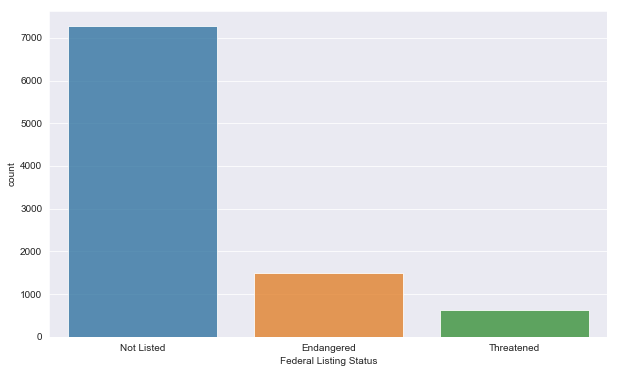

In [8]:
# federal listing status
print(y_train.count())
print('Endangered: ' + str((y_train == 'Endangered').sum() / y_train.count()))
print('Not Listed: ' + str((y_train == 'Not Listed').sum() / y_train.count()))
print('Threatened: ' + str((y_train == 'Threatened').sum() / y_train.count()))

# plot class imbalance
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(y_train,
              order=y_train.value_counts().index,
              alpha=0.8)

In [9]:
keys = list(y_train.unique())
values = np.ones((3), dtype=int) * (y_train == 'Not Listed').sum()
sample_ratio = dict(zip(keys, values))
sample_ratio

{'Not Listed': 7272, 'Endangered': 7272, 'Threatened': 7272}

21816
Endangered: 0.3333333333333333
Not Listed: 0.3333333333333333
Threatened: 0.3333333333333333


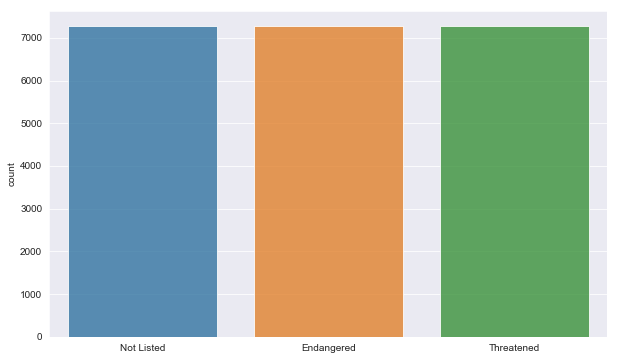

In [10]:
species['Federal Listing Status'].unique()

smote = SMOTE(ratio=sample_ratio)
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

# federal listing status
print(len(y_train_smote))
print('Endangered: ' + str((y_train_smote == 'Endangered').sum() / len(y_train_smote)))
print('Not Listed: ' + str((y_train_smote == 'Not Listed').sum() / len(y_train_smote)))
print('Threatened: ' + str((y_train_smote == 'Threatened').sum() / len(y_train_smote)))

# plot class imbalance
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(y_train_smote,
              order=y_train.value_counts().index,
              alpha=0.8)

### Balanced Classification Models

In [11]:
classifiers, metrics = clf.classify(classifiers, X_train_smote, X_test, y_train_smote, y_test)

balanced = pd.DataFrame(metrics, columns=['Model',
                                          'Split',
                                          'Accuracy',
                                          'Precision',
                                          'Recall',
                                          'F1 Score'])

balanced['Configuration'] = 'Balanced'
models = models.append(balanced, ignore_index=True)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

In [12]:
models.sort_values(by='F1 Score', ascending=False)

,Model,Split,Accuracy,Precision,Recall,F1 Score,Configuration
4,K Nearest Neighbors,Train,0.789541,0.744126,0.789541,0.743720,Baseline
6,Decision Tree,Train,0.799553,0.767348,0.799553,0.741888,Baseline
8,Random Forest,Train,0.798275,0.734748,0.798275,0.737128,Baseline
2,Logistic Regression,Train,0.797423,0.764109,0.797423,0.735916,Baseline
15,K Nearest Neighbors,Test,0.761073,0.696965,0.761073,0.719398,Balanced
9,Random Forest,Test,0.781516,0.714091,0.781516,0.719006,Baseline
7,Decision Tree,Test,0.776831,0.713973,0.776831,0.718401,Baseline
3,Logistic Regression,Test,0.779387,0.760888,0.779387,0.716301,Baseline
5,K Nearest Neighbors,Test,0.762777,0.692944,0.762777,0.713400,Baseline
19,Random Forest,Test,0.666951,0.754985,0.666951,0.699652,Balanced


In [13]:
balanced.pivot(index='Model', columns='Split').drop(
    'Configuration', axis=1).sort_values(by=('F1 Score','Train'), ascending=False)

Accuracy           Precision              Recall  \
Split                    Test     Train      Test     Train      Test   
Model                                                                   
Decision Tree        0.658859  0.574578  0.742570  0.596839  0.658859   
Random Forest        0.666951  0.555876  0.754985  0.593277  0.666951   
Logistic Regression  0.637564  0.550605  0.744207  0.572832  0.637564   
K Nearest Neighbors  0.761073  0.456087  0.696965  0.600842  0.761073   
Dummy                0.171210  0.333333  0.029313  0.111111  0.171210   

                               F1 Score            
Split                   Train      Test     Train  
Model                                              
Decision Tree        0.574578  0.690741  0.572160  
Random Forest        0.555876  0.699652  0.552109  
Logistic Regression  0.550605  0.675630  0.547995  
K Nearest Neighbors  0.456087  0.719398  0.383089  
Dummy                0.333333  0.050055  0.166667

### Tuned and Balanced Grid Search Classification Models

In [14]:
# list for all grid searches
grid_searches = []

In [15]:
# logistic regression parameters
parameters_log = dict(penalty=['l1', 'l2'],
                      C=[1e-2, 1e0, 1e2, 1e6, 1e12],
                      fit_intercept=[True, False],
                      multi_class=['ovr'],
                      solver=['liblinear'])

grid_searches.append({'Model': 'Logistic Regression',
                    'Classifier': GridSearchCV(LogisticRegression(),
                                               parameters_log,
                                               cv=5,
                                               scoring='f1_weighted',
                                               verbose=10,
                                               n_jobs=-1)})

# k nearest neighbors parameters
parameters_knn = dict(n_neighbors=[5,11],
                      weights=['uniform', 'distance'],
                      algorithm=['ball_tree','kd_tree'],
                      leaf_size=[100,200])

grid_searches.append({'Model': 'K Nearest Neighbors',
                    'Classifier': GridSearchCV(KNeighborsClassifier(),
                                               parameters_knn,
                                               cv=5,
                                               scoring='f1_weighted',
                                               verbose=10,
                                               n_jobs=-1)})

# decision tree parameters
parameters_tree = dict(criterion=['gini','entropy'],
                       max_depth=[6,8],
                       min_samples_leaf=[20,50,100],
                       max_features=[20,30,40],
                       min_impurity_decrease=[0.01,0.03,0.05])

grid_searches.append({'Model': 'Decision Tree',
                    'Classifier': GridSearchCV(DecisionTreeClassifier(),
                                               parameters_tree,
                                               cv=5,
                                               scoring='f1_weighted',
                                               verbose=10,
                                               n_jobs=-1)})

# random forest parameters
parameters_forest = dict(n_estimators=[100,200,300],
                         max_depth=[2,3,4],
                         min_samples_leaf=[100,200],
                         max_features=[10,20],
                         min_impurity_decrease=[0.01,0.03,0.05])

grid_searches.append({'Model': 'Random Forest',
                    'Classifier': GridSearchCV(RandomForestClassifier(),
                                               parameters_forest,
                                               cv=5,
                                               scoring='f1_weighted',
                                               verbose=10,
                                               n_jobs=-1)})

In [16]:
grid_searches, metrics = clf.grid_search(grid_searches, X_train_smote, X_test, y_train_smote, y_test, X.columns)

tuned = pd.DataFrame(metrics, columns=['Model',
                                       'Split',
                                       'Accuracy',
                                       'Precision',
                                       'Recall',
                                       'F1 Score'])

tuned['Configuration'] = 'Balanced and Tuned'
models = models.append(tuned, ignore_index=True, sort=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.6s finished


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 12.7min finished


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1846s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 300 tas

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

In [17]:
models.sort_values(by='F1 Score', ascending=False)

,Model,Split,Accuracy,Precision,Recall,F1 Score,Configuration
4,K Nearest Neighbors,Train,0.789541,0.744126,0.789541,0.743720,Baseline
6,Decision Tree,Train,0.799553,0.767348,0.799553,0.741888,Baseline
8,Random Forest,Train,0.798275,0.734748,0.798275,0.737128,Baseline
2,Logistic Regression,Train,0.797423,0.764109,0.797423,0.735916,Baseline
15,K Nearest Neighbors,Test,0.761073,0.696965,0.761073,0.719398,Balanced
9,Random Forest,Test,0.781516,0.714091,0.781516,0.719006,Baseline
7,Decision Tree,Test,0.776831,0.713973,0.776831,0.718401,Baseline
3,Logistic Regression,Test,0.779387,0.760888,0.779387,0.716301,Baseline
5,K Nearest Neighbors,Test,0.762777,0.692944,0.762777,0.713400,Baseline
23,K Nearest Neighbors,Test,0.749574,0.690486,0.749574,0.713013,Balanced and Tuned


In [18]:
tuned.pivot(index='Model', columns='Split').drop(
    'Configuration', axis=1).sort_values(by=('F1 Score','Train'), ascending=False)

Accuracy           Precision              Recall  \
Split                    Test     Train      Test     Train      Test   
Model                                                                   
Logistic Regression  0.637564  0.550605  0.744207  0.572832  0.637564   
Random Forest        0.647785  0.533232  0.748560  0.562854  0.647785   
Decision Tree        0.668228  0.535937  0.757794  0.574482  0.668228   
K Nearest Neighbors  0.749574  0.460304  0.690486  0.607474  0.749574   

                               F1 Score            
Split                   Train      Test     Train  
Model                                              
Logistic Regression  0.550605  0.675630  0.547995  
Random Forest        0.533232  0.684064  0.529337  
Decision Tree        0.535937  0.701478  0.528452  
K Nearest Neighbors  0.460304  0.713013  0.394107

In [19]:
balanced.pivot(index='Model', columns='Split').drop(
    'Configuration', axis=1).sort_values(by=('F1 Score','Train'), ascending=False)

Accuracy           Precision              Recall  \
Split                    Test     Train      Test     Train      Test   
Model                                                                   
Decision Tree        0.658859  0.574578  0.742570  0.596839  0.658859   
Random Forest        0.666951  0.555876  0.754985  0.593277  0.666951   
Logistic Regression  0.637564  0.550605  0.744207  0.572832  0.637564   
K Nearest Neighbors  0.761073  0.456087  0.696965  0.600842  0.761073   
Dummy                0.171210  0.333333  0.029313  0.111111  0.171210   

                               F1 Score            
Split                   Train      Test     Train  
Model                                              
Decision Tree        0.574578  0.690741  0.572160  
Random Forest        0.555876  0.699652  0.552109  
Logistic Regression  0.550605  0.675630  0.547995  
K Nearest Neighbors  0.456087  0.719398  0.383089  
Dummy                0.333333  0.050055  0.166667

In [20]:
baseline.pivot(index='Model', columns='Split').drop(
    'Configuration', axis=1).sort_values(by=('F1 Score','Train'), ascending=False)

Accuracy           Precision              Recall  \
Split                    Test     Train      Test     Train      Test   
Model                                                                   
K Nearest Neighbors  0.762777  0.789541  0.692944  0.744126  0.762777   
Decision Tree        0.776831  0.799553  0.713973  0.767348  0.776831   
Random Forest        0.781516  0.798275  0.714091  0.734748  0.781516   
Logistic Regression  0.779387  0.797423  0.760888  0.764109  0.779387   
Dummy                0.752981  0.774523  0.566981  0.599886  0.752981   

                               F1 Score            
Split                   Train      Test     Train  
Model                                              
K Nearest Neighbors  0.789541  0.713400  0.743720  
Decision Tree        0.799553  0.718401  0.741888  
Random Forest        0.798275  0.719006  0.737128  
Logistic Regression  0.797423  0.716301  0.735916  
Dummy                0.774523  0.646876  0.676110

### Data Loading

In [21]:
models.to_pickle("../Data/models.pkl")
baseline.to_pickle("../Data/baseline.pkl")
balanced.to_pickle("../Data/balanced.pkl")
tuned.to_pickle("../Data/tuned.pkl")

In [22]:
pickle.dump(grid_searches, open( "../Data/grid_searches.pkl", "wb" ))
pickle.dump(metrics, open( "../Data/metrics.pkl", "wb" ))

In [23]:
metrics

[{'Model': 'Logistic Regression',
  'Split': 'Train',
  'Best Parameters': {'C': 100.0,
   'fit_intercept': True,
   'multi_class': 'ovr',
   'penalty': 'l1',
   'solver': 'liblinear'},
  'Best Estimator': LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr',
            n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
            tol=0.0001, verbose=0, warm_start=False),
  'Accuracy': 0.5506050605060506,
  'Precision': 0.5728324034972518,
  'Recall': 0.5506050605060506,
  'F1 Score': 0.5479953334214984,
  'Confusion Matrix': array([[3220, 2143, 1909],
         [ 919, 5005, 1348],
         [ 573, 2912, 3787]])},
 {'Model': 'Logistic Regression',
  'Split': 'Test',
  'Best Parameters': {'C': 100.0,
   'fit_intercept': True,
   'multi_class': 'ovr',
   'penalty': 'l1',
   'solver': 'liblinear'},
  'Best Estimator': LogisticRegression(C=100.0, class_weight=None, dual=False, fit_inte

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Not Listed', 'Endangered', 'Threatened']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [28]:
gs_metrics = metrics.copy()
gs_metrics

[{'Model': 'Logistic Regression',
  'Split': 'Train',
  'Best Parameters': {'C': 100.0,
   'fit_intercept': True,
   'multi_class': 'ovr',
   'penalty': 'l1',
   'solver': 'liblinear'},
  'Best Estimator': LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr',
            n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
            tol=0.0001, verbose=0, warm_start=False),
  'Accuracy': 0.5506050605060506,
  'Precision': 0.5728324034972518,
  'Recall': 0.5506050605060506,
  'F1 Score': 0.5479953334214984,
  'Confusion Matrix': array([[3220, 2143, 1909],
         [ 919, 5005, 1348],
         [ 573, 2912, 3787]])},
 {'Model': 'Logistic Regression',
  'Split': 'Test',
  'Best Parameters': {'C': 100.0,
   'fit_intercept': True,
   'multi_class': 'ovr',
   'penalty': 'l1',
   'solver': 'liblinear'},
  'Best Estimator': LogisticRegression(C=100.0, class_weight=None, dual=False, fit_inte

In [29]:
gs_tuned = tuned.copy()
gs_tuned

,Model,Split,Accuracy,Precision,Recall,F1 Score,Configuration
0,Logistic Regression,Train,0.550605,0.572832,0.550605,0.547995,Balanced and Tuned
1,Logistic Regression,Test,0.637564,0.744207,0.637564,0.675630,Balanced and Tuned
2,K Nearest Neighbors,Train,0.460304,0.607474,0.460304,0.394107,Balanced and Tuned
3,K Nearest Neighbors,Test,0.749574,0.690486,0.749574,0.713013,Balanced and Tuned
4,Decision Tree,Train,0.535937,0.574482,0.535937,0.528452,Balanced and Tuned
5,Decision Tree,Test,0.668228,0.757794,0.668228,0.701478,Balanced and Tuned
6,Random Forest,Train,0.533232,0.562854,0.533232,0.529337,Balanced and Tuned
7,Random Forest,Test,0.647785,0.748560,0.647785,0.684064,Balanced and Tuned


In [30]:
all_models = models.copy()
all_models

,Model,Split,Accuracy,Precision,Recall,F1 Score,Configuration
0,Dummy,Train,0.774523,0.599886,0.774523,0.676110,Baseline
1,Dummy,Test,0.752981,0.566981,0.752981,0.646876,Baseline
2,Logistic Regression,Train,0.797423,0.764109,0.797423,0.735916,Baseline
3,Logistic Regression,Test,0.779387,0.760888,0.779387,0.716301,Baseline
4,K Nearest Neighbors,Train,0.789541,0.744126,0.789541,0.743720,Baseline
5,K Nearest Neighbors,Test,0.762777,0.692944,0.762777,0.713400,Baseline
6,Decision Tree,Train,0.799553,0.767348,0.799553,0.741888,Baseline
7,Decision Tree,Test,0.776831,0.713973,0.776831,0.718401,Baseline
8,Random Forest,Train,0.798275,0.734748,0.798275,0.737128,Baseline
9,Random Forest,Test,0.781516,0.714091,0.781516,0.719006,Baseline


In [32]:
classifiers, metrics = clf.classify(classifiers, X_train, X_test, y_train, y_test)

baseline = pd.DataFrame(metrics, columns=['Model',
                                          'Split',
                                          'Accuracy',
                                          'Precision',
                                          'Recall',
                                          'F1 Score'])
baseline['Configuration'] = 'Baseline'
baseline

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

,Model,Split,Accuracy,Precision,Recall,F1 Score,Configuration
0,Dummy,Train,0.774523,0.599886,0.774523,0.676110,Baseline
1,Dummy,Test,0.752981,0.566981,0.752981,0.646876,Baseline
2,Logistic Regression,Train,0.797423,0.764109,0.797423,0.735916,Baseline
3,Logistic Regression,Test,0.779387,0.760888,0.779387,0.716301,Baseline
4,K Nearest Neighbors,Train,0.789541,0.744126,0.789541,0.743720,Baseline
5,K Nearest Neighbors,Test,0.762777,0.692944,0.762777,0.713400,Baseline
6,Decision Tree,Train,0.799553,0.761812,0.799553,0.741842,Baseline
7,Decision Tree,Test,0.777257,0.715890,0.777257,0.719150,Baseline
8,Random Forest,Train,0.798062,0.734199,0.798062,0.736969,Baseline
9,Random Forest,Test,0.781516,0.714091,0.781516,0.719006,Baseline


In [36]:
metrics[0]['Confusion Matrix']

array([[   0, 1497,    0],
       [   0, 7272,    0],
       [   0,  620,    0]])

In [37]:
metrics

[{'Model': 'Dummy',
  'Split': 'Train',
  'Accuracy': 0.7745233784215572,
  'Precision': 0.5998864637215426,
  'Recall': 0.7745233784215572,
  'F1 Score': 0.6761099583316205,
  'Confusion Matrix': array([[   0, 1497,    0],
         [   0, 7272,    0],
         [   0,  620,    0]])},
 {'Model': 'Dummy',
  'Split': 'Test',
  'Accuracy': 0.7529812606473595,
  'Precision': 0.5669807788860867,
  'Recall': 0.7529812606473595,
  'F1 Score': 0.646876029555166,
  'Confusion Matrix': array([[   0,  402,    0],
         [   0, 1768,    0],
         [   0,  178,    0]])},
 {'Model': 'Logistic Regression',
  'Split': 'Train',
  'Accuracy': 0.7974225157098732,
  'Precision': 0.7641093820058736,
  'Recall': 0.7974225157098732,
  'F1 Score': 0.735915935436618,
  'Confusion Matrix': array([[ 294, 1200,    3],
         [  81, 7188,    3],
         [  40,  575,    5]])},
 {'Model': 'Logistic Regression',
  'Split': 'Test',
  'Accuracy': 0.7793867120954003,
  'Precision': 0.7608881380652833,
  'Recall': 

In [51]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes, rotation=90)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [63]:
metrics_base = metrics.copy()

Confusion Matrix, without normalization
[[   0 1497    0]
 [   0 7272    0]
 [   0  620    0]]
Confusion Matrix, without normalization
[[   0  402    0]
 [   0 1768    0]
 [   0  178    0]]
Confusion Matrix, without normalization
[[ 294 1200    3]
 [  81 7188    3]
 [  40  575    5]]
Confusion Matrix, without normalization
[[  89  312    1]
 [  29 1739    0]
 [   9  167    2]]
Confusion Matrix, without normalization
[[ 400 1091    6]
 [ 260 6993   19]
 [ 103  497   20]]
Confusion Matrix, without normalization
[[ 108  292    2]
 [  75 1681   12]
 [  36  140    2]]
Confusion Matrix, without normalization
[[ 334 1158    5]
 [ 101 7167    4]
 [  43  571    6]]
Confusion Matrix, without normalization
[[ 101  298    3]
 [  42 1723    3]
 [  12  165    1]]
Confusion Matrix, without normalization
[[ 310 1187    0]
 [  89 7183    0]
 [  40  580    0]]
Confusion Matrix, without normalization
[[  96  306    0]
 [  29 1739    0]
 [   9  169    0]]


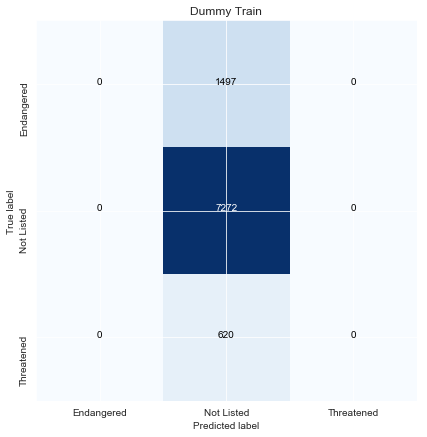

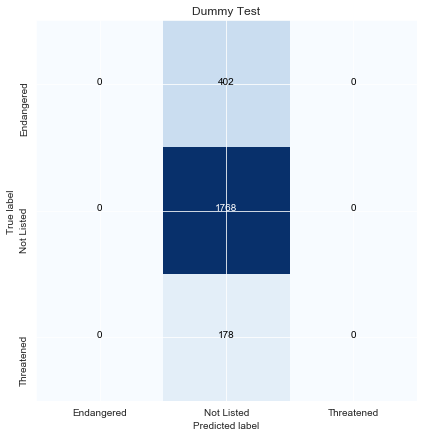

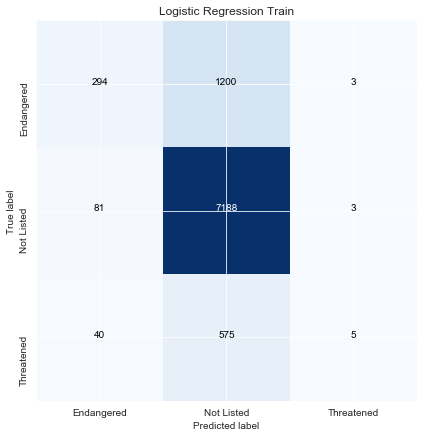

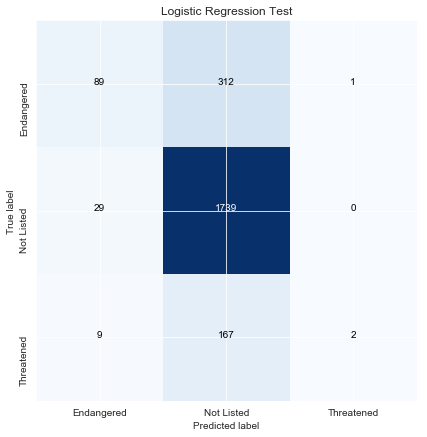

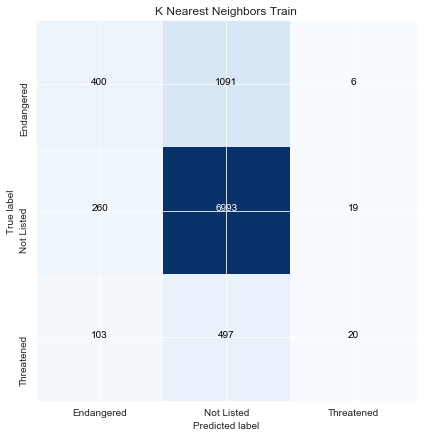

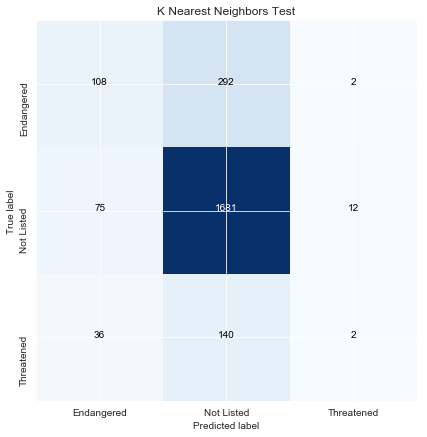

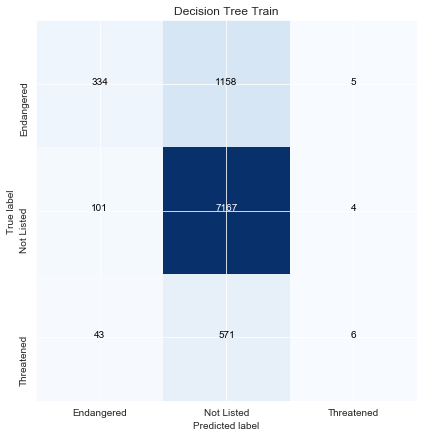

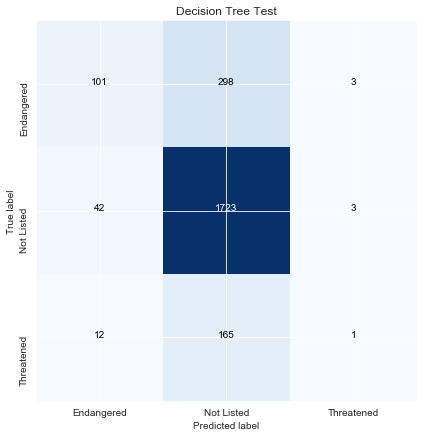

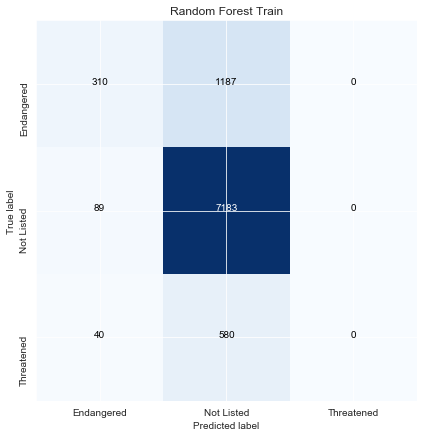

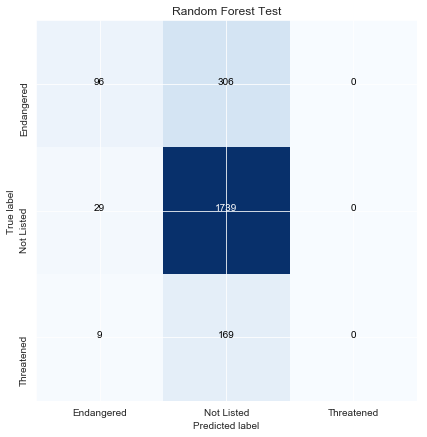

In [64]:
from sklearn.metrics import confusion_matrix
classes = ['Endangered', 'Not Listed', 'Threatened']

for i in range(len(metrics_base)):
    fig, ax = plt.subplots(figsize=(10,6))
    plot_confusion_matrix(metrics_base[i]['Confusion Matrix'], classes,
                          normalize=False,
                          title=''+metrics_base[i]['Model']+' '+metrics_base[i]['Split'],
                          cmap=plt.cm.Blues)

Confusion Matrix, without normalization
[[3220 2143 1909]
 [ 919 5005 1348]
 [ 573 2912 3787]]
Confusion Matrix, without normalization
[[ 199  111   92]
 [ 239 1204  325]
 [  15   69   94]]
Confusion Matrix, without normalization
[[2481 4733   58]
 [ 413 6794   65]
 [1651 4854  767]]
Confusion Matrix, without normalization
[[ 129  266    7]
 [ 113 1627   28]
 [  40  134    4]]
Confusion Matrix, without normalization
[[2838 2477 1957]
 [ 551 5440 1281]
 [ 514 3344 3414]]
Confusion Matrix, without normalization
[[ 176  121  105]
 [ 160 1296  312]
 [  13   68   97]]
Confusion Matrix, without normalization
[[3093 2359 1820]
 [ 855 5137 1280]
 [ 526 3343 3403]]
Confusion Matrix, without normalization
[[ 194  111   97]
 [ 228 1230  310]
 [  14   67   97]]


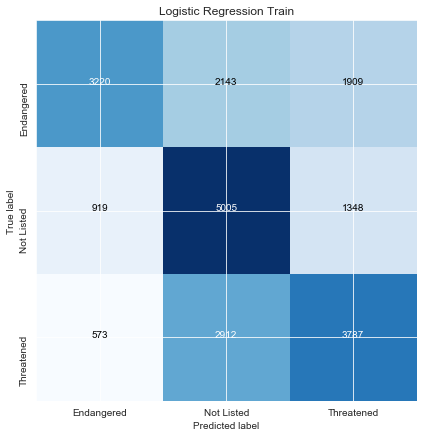

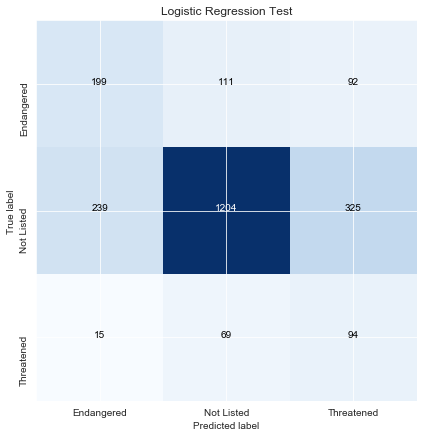

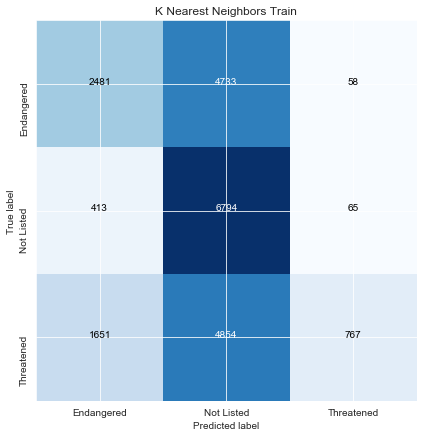

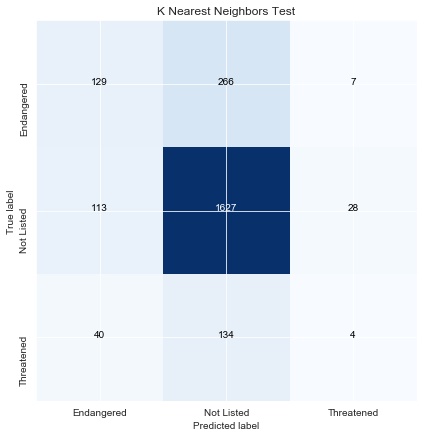

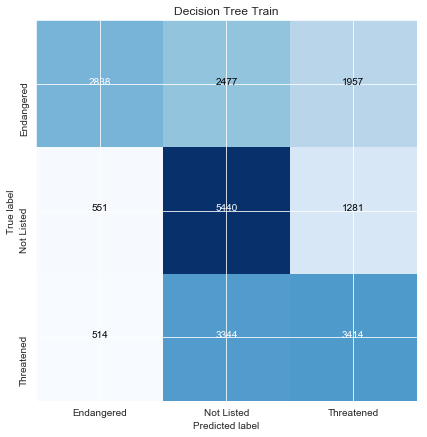

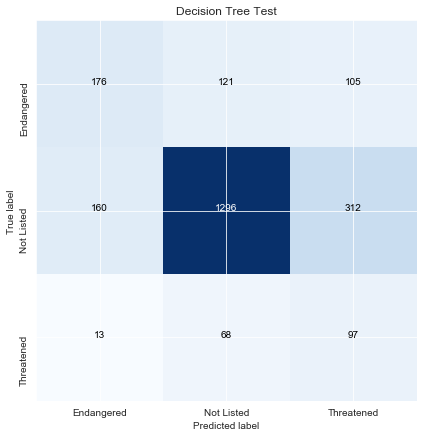

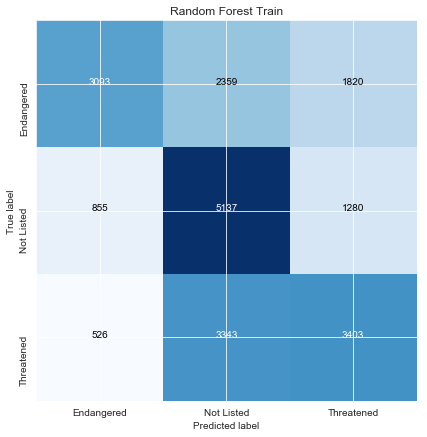

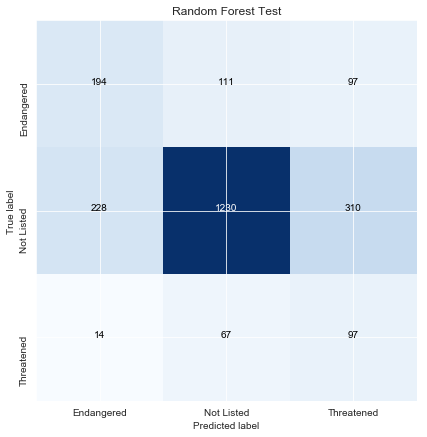

In [62]:
for i in range(len(gs_metrics)):
    fig, ax = plt.subplots(figsize=(10,6))
    plot_confusion_matrix(gs_metrics[i]['Confusion Matrix'], classes,
                          normalize=False,
                          title=''+gs_metrics[i]['Model']+' '+gs_metrics[i]['Split'],
                          cmap=plt.cm.Blues)

In [65]:
classifiers, metrics_balanced = clf.classify(classifiers, X_train_smote, X_test, y_train_smote, y_test)

Confusion Matrix, without normalization
[[7272    0    0]
 [7272    0    0]
 [7272    0    0]]
Confusion Matrix, without normalization
[[ 402    0    0]
 [1768    0    0]
 [ 178    0    0]]
Confusion Matrix, without normalization
[[3220 2143 1909]
 [ 919 5005 1348]
 [ 573 2912 3787]]
Confusion Matrix, without normalization
[[ 199  111   92]
 [ 239 1204  325]
 [  15   69   94]]
Confusion Matrix, without normalization
[[2366 4806  100]
 [ 313 6929   30]
 [1585 5032  655]]
Confusion Matrix, without normalization
[[ 125  270    7]
 [  90 1659   19]
 [  41  134    3]]
Confusion Matrix, without normalization
[[3714 2080 1478]
 [ 972 5283 1017]
 [ 653 3095 3524]]
Confusion Matrix, without normalization
[[ 205  113   84]
 [ 258 1260  250]
 [  32   70   76]]
Confusion Matrix, without normalization
[[3264 2359 1649]
 [ 696 5395 1181]
 [ 515 3324 3433]]
Confusion Matrix, without normalization
[[ 193  117   92]
 [ 197 1280  291]
 [  19   68   91]]


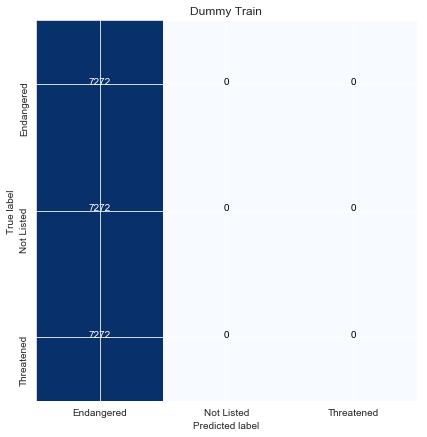

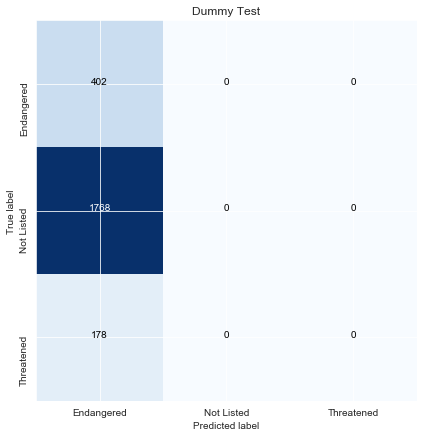

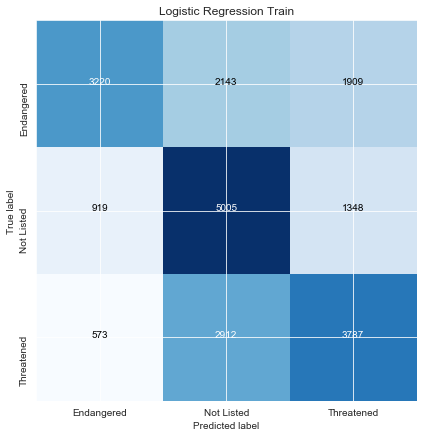

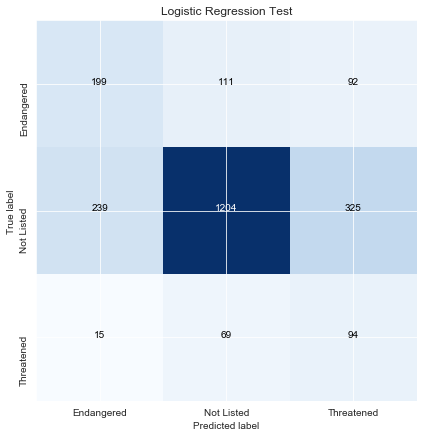

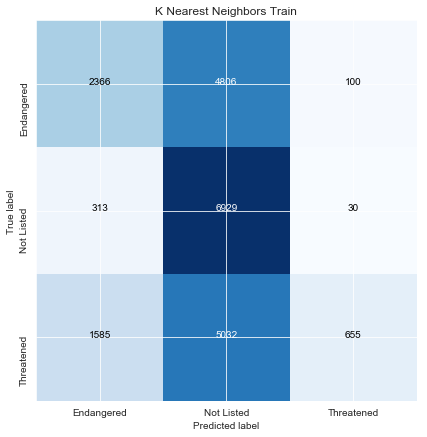

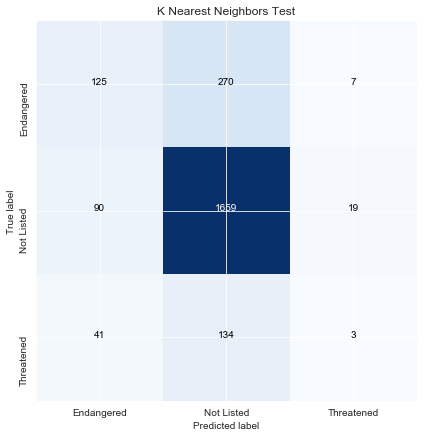

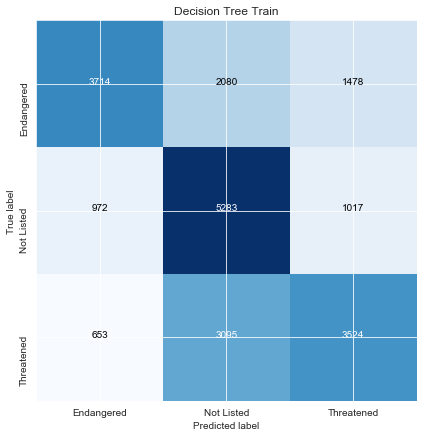

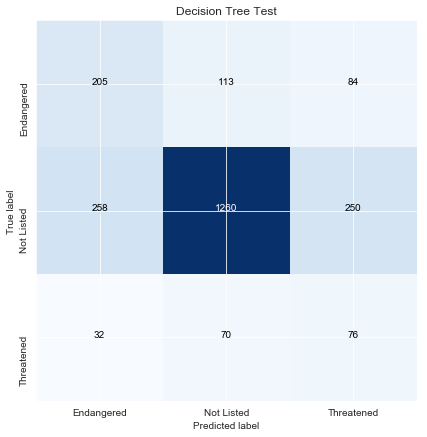

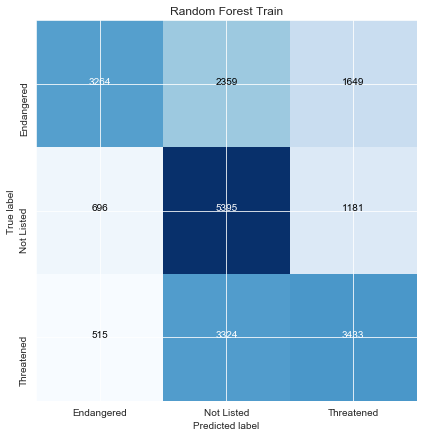

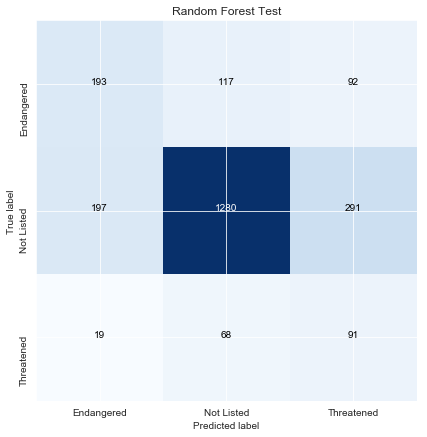

In [66]:
for i in range(len(metrics_balanced)):
    fig, ax = plt.subplots(figsize=(10,6))
    plot_confusion_matrix(metrics_balanced[i]['Confusion Matrix'], classes,
                          normalize=False,
                          title=''+metrics_balanced[i]['Model']+' '+metrics_balanced[i]['Split'],
                          cmap=plt.cm.Blues)

In [79]:
grid_searches[0]['Classifier'].best_estimator_.coef_[0]

array([-1.20182044e-01, -6.74748097e-01, -6.38686413e-03, -1.22820154e+00,
        1.74504882e-01, -1.34185897e-01,  3.80244989e-03, -1.26367440e+00,
       -3.79742240e-01, -8.11644008e-01, -6.30811109e-03,  2.41783824e-01,
       -1.10242163e+00, -3.42243287e-01, -3.31838868e-03,  1.35342412e-03,
        2.32406701e-02,  1.95983587e-02, -1.04370147e+00, -4.15832444e-02,
        2.70102002e-02,  1.82309017e+00, -2.08405243e+00,  9.16021375e-02,
        6.59466650e-01, -8.92247734e-04,  4.86650022e-02, -1.97785530e-01,
       -2.94901338e-02, -2.05155031e-02, -9.04266229e-01, -9.86840306e-01,
       -1.13295938e+00,  1.42000733e-02, -1.51112060e-01, -4.71838306e-03,
       -1.59910051e-03, -6.60109324e-01, -2.87112208e-02, -1.14899211e+00,
       -2.94510658e-01, -1.60166022e+00])

In [80]:
X.columns

Index(['Group_Amphibians', 'Group_Birds', 'Group_Clams', 'Group_Crustaceans',
       'Group_Ferns and Allies', 'Group_Fishes', 'Group_Flowering Plants',
       'Group_Insects', 'Group_Mammals', 'Group_Reptiles', 'Group_Snails',
       'VIP_I', 'VIP_P', 'VIP_V', 'State_AL', 'State_AR', 'State_AZ',
       'State_CA', 'State_CO', 'State_FL', 'State_GA', 'State_HI', 'State_ID',
       'State_IL', 'State_IN', 'State_KY', 'State_MO', 'State_MS', 'State_NC',
       'State_NM', 'State_NV', 'State_NY', 'State_OR', 'State_PA', 'State_SC',
       'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_WA', 'State_WV',
       'State_WY'],
      dtype='object')

In [82]:
best_log_params = list(zip(X.columns, grid_searches[0]['Classifier'].best_estimator_.coef_[0]))
best_log_params

[('Group_Amphibians', -0.12018204398350801),
 ('Group_Birds', -0.6747480972041118),
 ('Group_Clams', -0.00638686412850858),
 ('Group_Crustaceans', -1.2282015392563481),
 ('Group_Ferns and Allies', 0.17450488211272905),
 ('Group_Fishes', -0.13418589741711606),
 ('Group_Flowering Plants', 0.003802449890270687),
 ('Group_Insects', -1.2636744038780934),
 ('Group_Mammals', -0.3797422399170324),
 ('Group_Reptiles', -0.8116440084636584),
 ('Group_Snails', -0.006308111093642779),
 ('VIP_I', 0.2417838237282823),
 ('VIP_P', -1.1024216278448067),
 ('VIP_V', -0.3422432871306393),
 ('State_AL', -0.003318388678275592),
 ('State_AR', 0.001353424116279291),
 ('State_AZ', 0.023240670088594234),
 ('State_CA', 0.019598358694738253),
 ('State_CO', -1.0437014736574535),
 ('State_FL', -0.041583244359613046),
 ('State_GA', 0.027010200162016614),
 ('State_HI', 1.8230901723956843),
 ('State_ID', -2.084052434251203),
 ('State_IL', 0.09160213752986926),
 ('State_IN', 0.6594666504033226),
 ('State_KY', -0.0008922

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [87]:
best_log_params.sort(key = lambda x: abs(x[1]), reverse=True)
best_log_params

[('State_ID', -2.084052434251203),
 ('State_HI', 1.8230901723956843),
 ('State_WY', -1.6016602240243927),
 ('Group_Insects', -1.2636744038780934),
 ('Group_Crustaceans', -1.2282015392563481),
 ('State_WA', -1.148992111328597),
 ('State_OR', -1.132959380613751),
 ('VIP_P', -1.1024216278448067),
 ('State_CO', -1.0437014736574535),
 ('State_NY', -0.9868403064676509),
 ('State_NV', -0.9042662285651347),
 ('Group_Reptiles', -0.8116440084636584),
 ('Group_Birds', -0.6747480972041118),
 ('State_UT', -0.6601093235938351),
 ('State_IN', 0.6594666504033226),
 ('Group_Mammals', -0.3797422399170324),
 ('VIP_V', -0.3422432871306393),
 ('State_WV', -0.29451065823057404),
 ('VIP_I', 0.2417838237282823),
 ('State_MS', -0.19778553044086333),
 ('Group_Ferns and Allies', 0.17450488211272905),
 ('State_SC', -0.1511120599119659),
 ('Group_Fishes', -0.13418589741711606),
 ('Group_Amphibians', -0.12018204398350801),
 ('State_IL', 0.09160213752986926),
 ('State_MO', 0.04866500215626679),
 ('State_FL', -0.0415

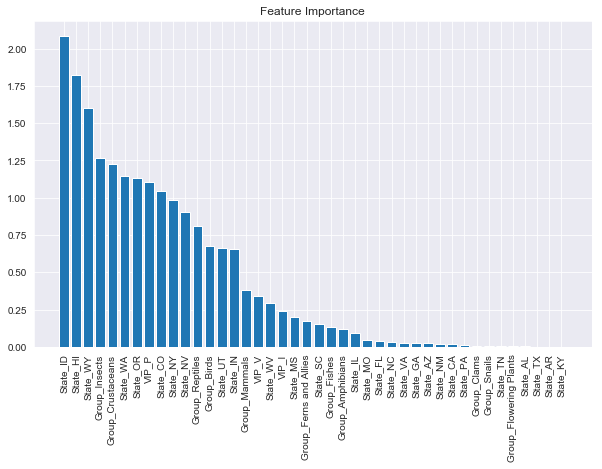

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline  

# Rearrange feature names so they match the sorted feature importances
model_features = [i[0] for i in best_log_params]

feature_weights = [abs(i[1]) for i in best_log_params]

# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(model_features, feature_weights)

# Add feature names as x-axis labels
# plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xticks(rotation=90)

# Show plot
plt.show()